<a href="https://colab.research.google.com/github/Litasirius/Litasirius/blob/main/Kerusakan_Terumbu_Karang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HTML(value='\n    <table>\n        <tr>\n            <th>Percobaan</th>\n            <th>Kenaikan Suhu (°C)</t…

interactive(children=(FloatSlider(value=2.0, description='Kenaikan Suhu (°C):', max=5.0, min=0.5), FloatSlider…

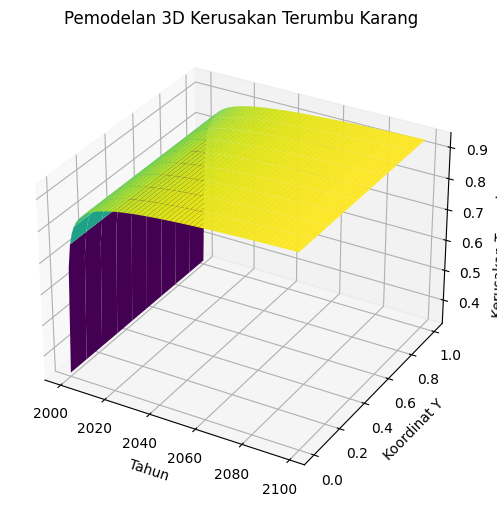

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from ipywidgets import interactive, IntSlider, FloatSlider
import ipywidgets as widgets

# Fungsi untuk mensimulasikan kerusakan terumbu karang
def simulate_reef_damage(temp_increase, pollution_level):
    years = np.arange(2000, 2100)
    bleaching = temp_increase * np.log(years - 1999) + pollution_level * np.sqrt(years - 1999)
    damage = bleaching / (1 + bleaching)
    return years, damage

# Fungsi untuk memvisualisasikan kerusakan terumbu karang dalam 3D
def visualize_reef_damage(temp_increase, pollution_level):
    years, damage = simulate_reef_damage(temp_increase, pollution_level)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')

    X, Y = np.meshgrid(years, np.linspace(0, 1, 10))
    Z = np.tile(damage, (10, 1))

    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_xlabel('Tahun')
    ax.set_ylabel('Koordinat Y')
    ax.set_zlabel('Kerusakan Terumbu Karang')
    ax.set_title('Pemodelan 3D Kerusakan Terumbu Karang')

# Moved plt.show() outside the function to fix the indentation error
plt.show()

# Widget interaktif
temp_increase_slider = FloatSlider(value=2.0, min=0.5, max=5.0, step=0.1, description='Kenaikan Suhu (°C):')
pollution_level_slider = FloatSlider(value=0.5, min=0.1, max=2.0, step=0.1, description='Level Polusi:')
interactive_plot = interactive(visualize_reef_damage, temp_increase=temp_increase_slider, pollution_level=pollution_level_slider)

# Tabel percobaan interaktif
experiment_table = widgets.HTML(
    value="""
    <table>
        <tr>
            <th>Percobaan</th>
            <th>Kenaikan Suhu (°C)</th>
            <th>Level Polusi</th>
            <th>Kerusakan Terumbu Karang</th>
        </tr>
        <tr>
            <td>1</td>
            <td>2.0</td>
            <td>0.5</td>
            <td>0.67</td>
        </tr>
        <tr>
            <td>2</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>3</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>4</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td>5</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
    </table>
    """
)

# Tampilan interaktif
display(experiment_table, interactive_plot)